In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation

from IPython.display import HTML
from random import random
from random import gauss

Функция генерации случайного числа в диапозоне

In [2]:
def rand_in_range(min, max):
    return min + (random() * (max - min))

Класс объекта точки на плоскости. Метод generate_points_around() создает n точек в круге радиуса r с центром в (x, y) и создан для проверки работоспособности алгоритма кластеризации.

In [3]:
class point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def generate_points_around(x, y, r, n):
        points = []
        for i in range(n):
            while True:
                x_t = gauss(0, r) + x
                y_t = gauss(0, r) + y
                if (x - x_t)**2 + (y - y_t)**2 <= r**2:
                    points.append(point(x_t, y_t))
                    break
        return points

Класс объекта кластера: содержит координаты центра и массив точек, принадлежащих кластеру. Метод improve_() модифицирует кластер, перемещая его центр в геометрисеский центр точек кластера.

In [4]:
class cluster():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.points = []
    def improve_(self):
        x_mid = 0
        y_mid = 0
        for p in self.points:
            x_mid += p.x
            y_mid += p.y
        if len(self.points) != 0:
            x_mid /= len(self.points)
            y_mid /= len(self.points)
        self.x = x_mid
        self.y = y_mid

Функция, помещающая каждую точку из all_points точку в кластер с ближайшим центром.

In [5]:
def init_clusters(clusters, all_points):
    for c in clusters:
        c.points = []
    for p in all_points:
        min_dist = 999999.0
        min_clust = clusters[0]
        for c in clusters:
            dist = math.sqrt((p.x - c.x)**2 + (p.y - c.y)**2)
            if dist < min_dist:
                min_dist = dist
                min_clust = c
        min_clust.points.append(p)

Задание необходимых констант

In [30]:
in_one_group = 400       # Колиество точек в одной группе
group_emount = 2         # Количество групп
clusters_emount = 4      # Количество кластеров
radius = 20              # Радиус кругов с генерируемыми точками 

# Границы проскости
x_min = 0
x_max = 100
y_min = 0
y_max = 100

# Массив с цветами для визуализации
colors=["#0000FF", "#00FF00", "#FF0066", "#999999", "#555555", "#111111"]

Задание массива с точками на плоскости и его заполнение

In [31]:
all_points = []

# for i in range(group_emount):
#     new_points = point.generate_points_around(rand_in_range(x_min + radius, x_max - radius), rand_in_range(y_min + radius, y_max - radius), radius, in_one_group)
#     all_points += new_points

for i in range(in_one_group * group_emount):
    all_points.append(point(rand_in_range(x_min, x_max), rand_in_range(y_min, y_max)))

Создание массива кластеров со случайными центрами в пределах плоскости

In [32]:
clusters = []
for i in range(clusters_emount):
    c = cluster(rand_in_range(x_min, x_max), rand_in_range(y_min, y_max))
    clusters.append(c)

Заполнение кластеров точками

In [33]:
init_clusters(clusters, all_points)

Вывод первоначальной кластеризации

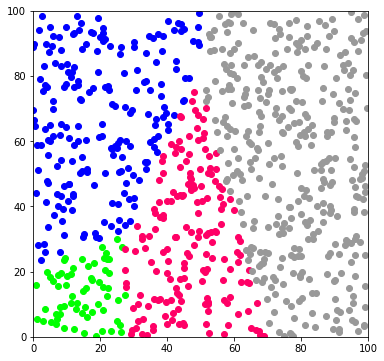

In [34]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))

for i in range(clusters_emount):
    ax.scatter([p.x for p in clusters[i].points], [p.y for p in clusters[i].points], color=colors[i])
plt.show()

Создание анимации, в каждом кадре i функция animate() улучшает кластеризацию добавляет кадр к анимации

In [35]:
def animate(i):
    for i in range(clusters_emount):
        plt.scatter([p.x for p in clusters[i].points],[p.y for p in clusters[i].points], color=colors[i])
        # plt.scatter([c.x for c in clusters],[c.y for c in clusters], color="#111111")
    for c in clusters:
        c.improve_()
    init_clusters(clusters, all_points)
    return []

def init():
    return []

Вывод анимации

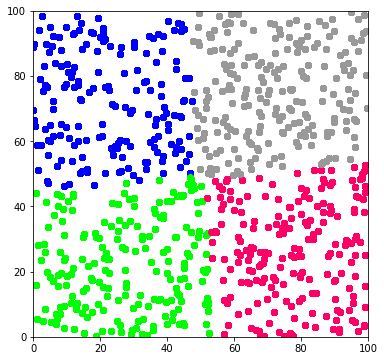

In [36]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

anim = animation.FuncAnimation(fig,animate,frames=30,interval=100,init_func=init,blit=False,repeat=0)
HTML(anim.to_jshtml())

Сохранение анимации в формате gif

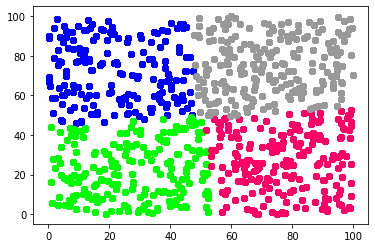

In [37]:
anim.save('animation.gif', writer='imagemagick', fps=8)